# Import Libraries

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
sns.set()

# Load & Explore Data

In [2]:
#load data on dataframe
ds = pd.read_csv('data.csv')

In [3]:
#display dataframe
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#count of rows and columns
ds.shape

(569, 33)

In [5]:
#count number of null(empty) values
ds.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Drop the column with null values
ds.dropna(axis = 1, inplace=True)

In [7]:
# count of rows and columns
ds.shape

(569, 32)

In [8]:
#Get count of number of M or B cells in diagnosis
ds.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Bar Chart

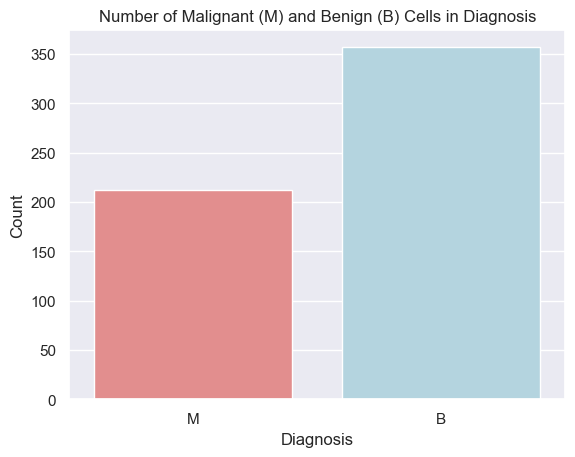

In [9]:
sns.countplot(x='diagnosis', data=ds, palette={'M': 'lightcoral', 'B': 'lightblue'})

plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Number of Malignant (M) and Benign (B) Cells in Diagnosis')

plt.show()

``The countplot reveals a there are more benign cases (B) than malignant cases (M).``

### Correlation Heatmap

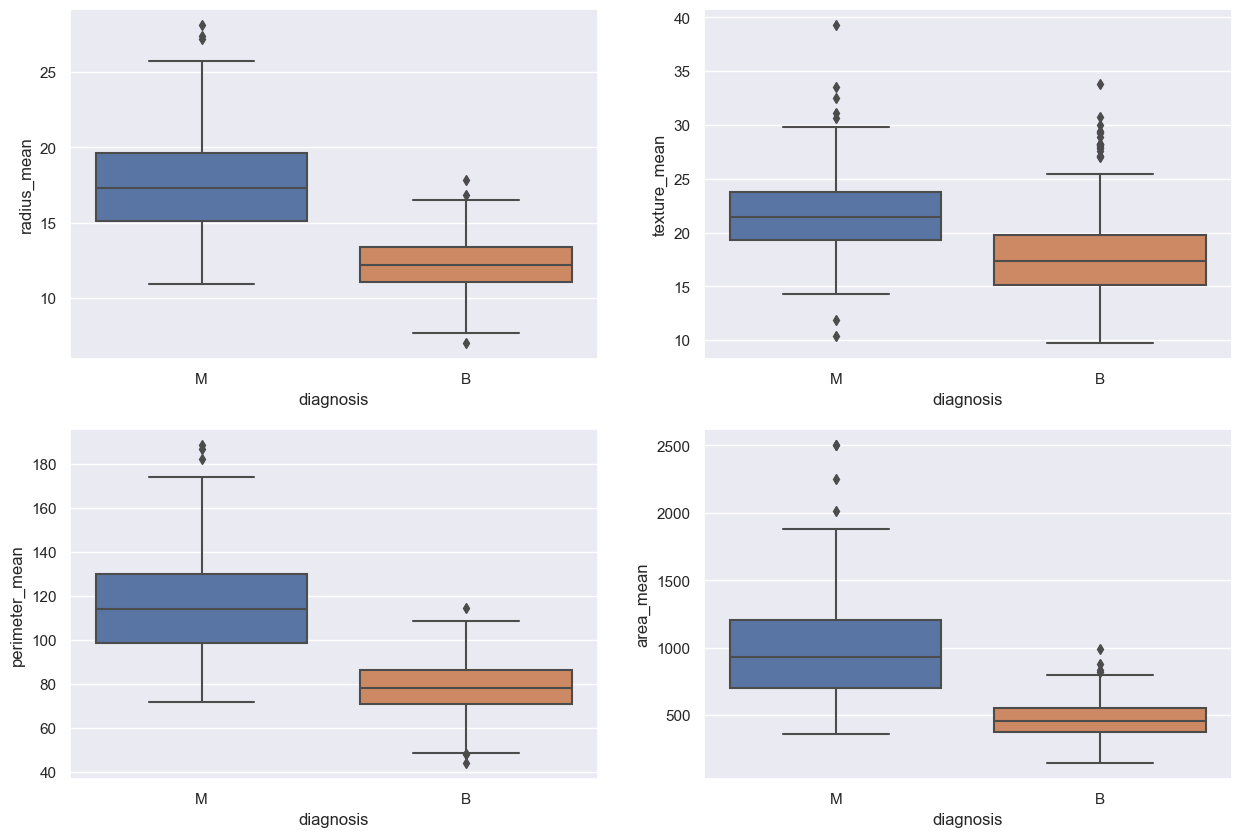

In [10]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=ds)

### Pairplot

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


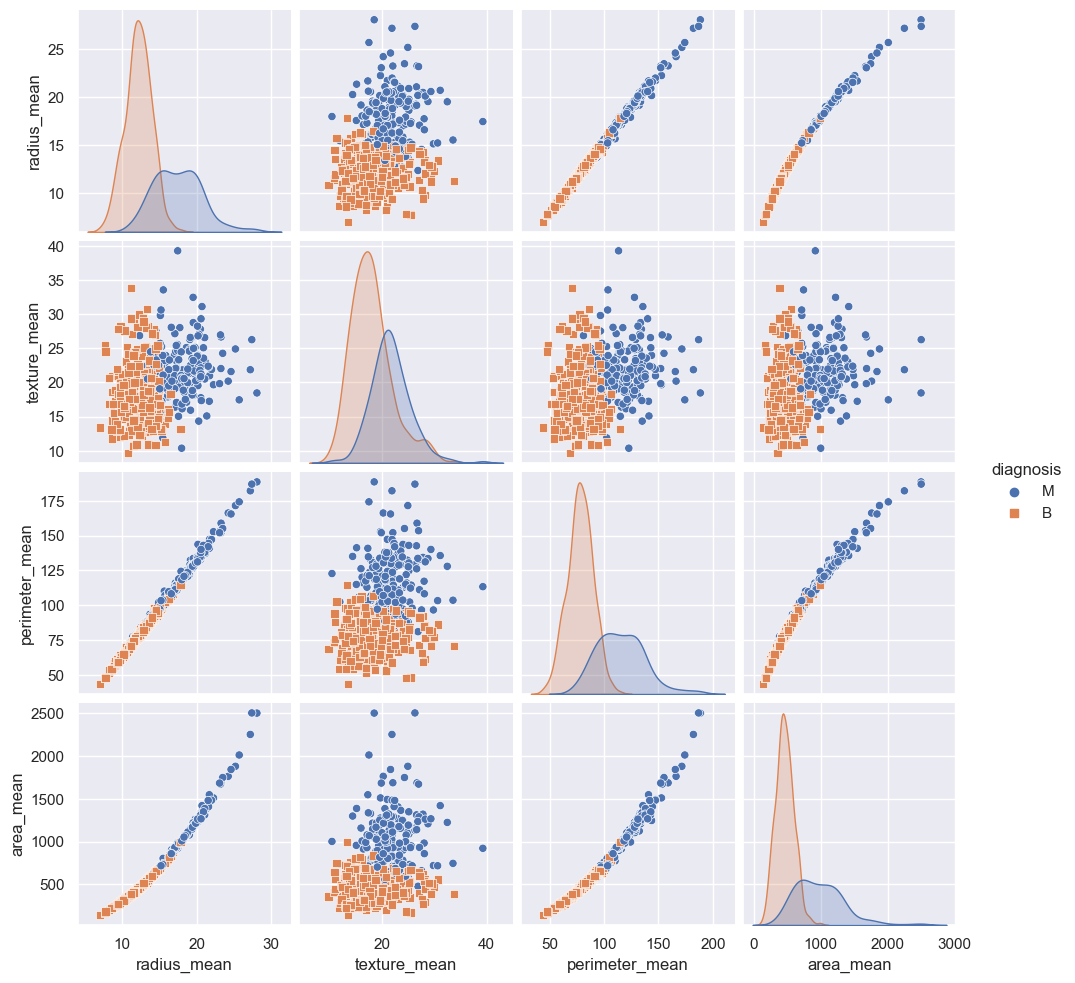

In [11]:
sns.pairplot(ds[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']], hue='diagnosis', markers=['o', 's'])

# Label Encoding

In [12]:
#Get Datatypes of each column in our dataset
ds.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
#Encode the diagnosis values
labelencoder = LabelEncoder()
ds.diagnosis = labelencoder.fit_transform(ds.diagnosis)

In [14]:
#display df
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Correlation Matrix

<Axes: >

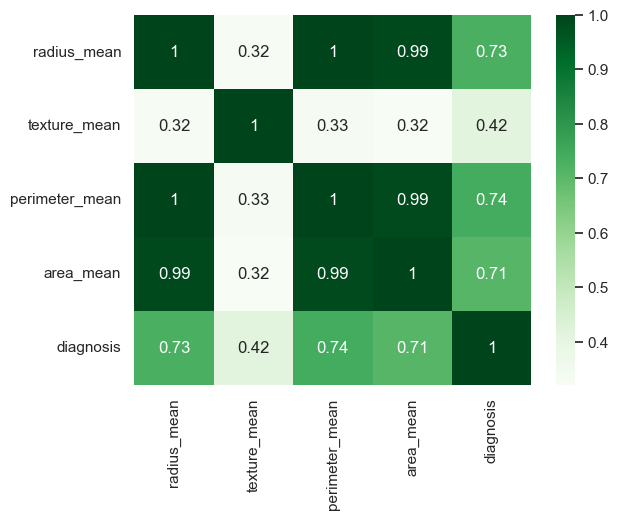

In [15]:
correlation_matrix = ds[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')

# Split Dataset & Feature Scaling

In [16]:
#Splitting the dataset into independent and dependent datasets
X = ds.iloc[:,2:]
y = ds.iloc[:,1]

In [17]:
#Splitting datasets into training(75%) and testing(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [18]:
#Scaling the data(feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
#print data
X_train

array([[-0.47650454,  1.06916993, -0.32927472, ...,  1.63977233,
         2.51102177,  6.93389202],
       [-1.13284528, -0.42993074, -1.11459218, ..., -0.88853091,
         0.30596389,  0.2511347 ],
       [-1.55140644, -0.82140096, -1.50121001, ..., -0.1350124 ,
         0.08899023,  1.01876004],
       ...,
       [-0.81331097, -1.46387267, -0.8183796 , ..., -0.40276009,
        -0.23562927, -0.18215711],
       [-0.93133716, -0.86975904, -0.89420336, ..., -0.52271106,
        -0.49128815,  1.37098435],
       [-0.44771767, -0.07530477, -0.4146806 , ..., -0.32396577,
        -1.26499267, -0.648435  ]])

# Build a Logistic Regression Model

In [20]:
#build a logistic regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
#make use of trained model to make predictions on test data
prediction = lr.predict(X_test)

# Performance Evaluation

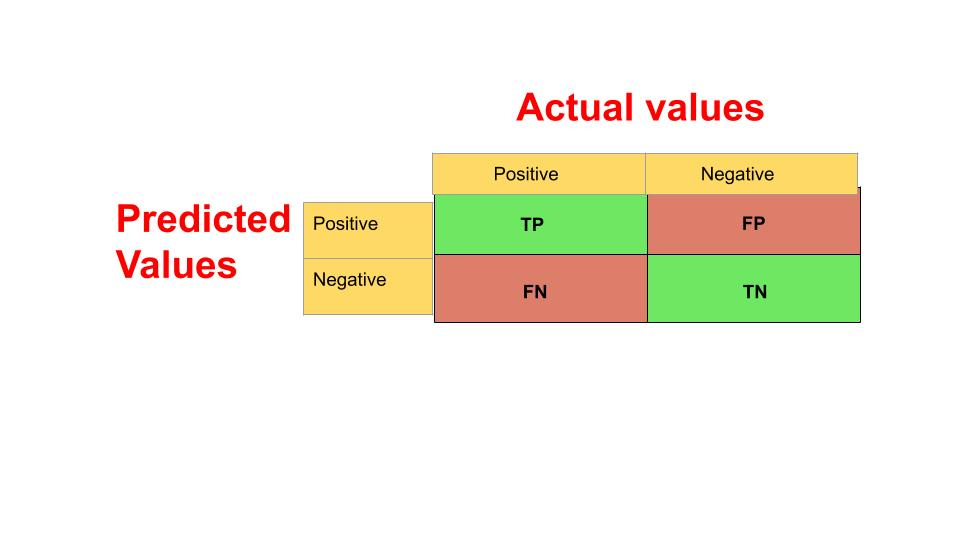

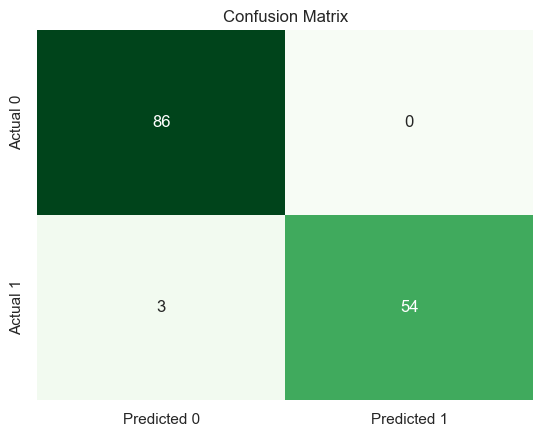

In [22]:
#plot confusion matrix
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

In [23]:
#get accuracy score for model
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9790209790209791
Precision: 1.0
Recall: 0.9473684210526315
F1 Score: 0.972972972972973


----